<div style="text-align: right;">
<h4> <b>Author:</b> <a style="color:blue;">Sujith Kumar</a> </h4>
<h4> <b>Subject:</b> <a style="color:blue;">Linear Regression Case Study</a> </h4>
<h4> <b>Batch:</b> <a style="color:blue;">April 2022</a> </h4>
</div>   

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries
import numpy as np
import pandas as pd

# Read the Data

In [3]:
# load the data set
bike_df = pd.read_csv("day.csv")

# Understanding the data

In [4]:
#Get the shape of the dataset
bike_df.shape

(730, 16)

In [5]:
#print head and tail rows to look at the data
bike_df.head().append(bike_df.tail())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
#Check counts per year to understand data set
bike_df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [7]:
# Check holiday counts to determine which value is holiday
bike_df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [8]:
# Check holiday counts to determine which value is holiday
bike_df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

#### For Holiday - Value 1 is for Holiday ; For workingday - Value 0 is either weekend or holiday 

In [9]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
# Get the null counts
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Cleaning / Preparing the data

In [12]:
#Converting dteday to datetime
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],dayfirst=True)

In [13]:
# There are no null columns in the dataset
# drop instant column as it is just the index
bike_df.drop('instant',axis=1,inplace=True)

In [14]:
# Define map function to put categorical values on season so that it is considered accordingly in model
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [15]:
#Define map for weather
def weather_map(x):
    return x.map({1:'clear', 2:'misty', 3:'rainy', 4:'bad'})

In [16]:
#Convert values for season and weathersit
bike_df[['season']]=bike_df[['season']].apply(season_map)

In [17]:
bike_df[['weathersit']]=bike_df[['weathersit']].apply(weather_map)

In [18]:
# It is observed that weekday values are starting from 0 as Tuesday
# Change weekday from numeric to Categorical
bike_df['weekday'] =bike_df['dteday'].dt.strftime('%a')

In [19]:
# Change the Month into categorical variable 
bike_df['mnth'] =bike_df['dteday'].dt.strftime('%b')


- cnt is a variable which is derived by adding casual and registered users
- Since cnt is the target variable, casual and registered can be dropped
- Before dropping verify if there is any discrepancy in the way cnt is calculated

In [20]:
# Check if there is any discrepancy in cnt calculation
eval_cnt = bike_df.cnt-bike_df.registered-bike_df.casual
eval_cnt.value_counts()

0    730
dtype: int64

In [21]:
# Drop casual and registered on the basis of above analysis
bike_df.drop(['casual','registered'],axis=1,inplace=True)

#### Derive number of days since business operation has started

In [22]:
bike_df['days_of_business'] = bike_df['dteday']-bike_df.dteday[0]
bike_df['days_of_business'] = bike_df['days_of_business'].astype('str')
bike_df['days_of_business'] = bike_df['days_of_business'].apply(lambda x: x.replace(' days',''))
bike_df['days_of_business'] = bike_df['days_of_business'].astype('int32')

- Since all the needed attributes from a date - Year, Month, days since inception are present, we can drop dteday

In [23]:
#Drop dteday as other required attributes Year, Month are present
bike_df.drop(['dteday'],axis=1,inplace=True)

### Observe correlation between various features

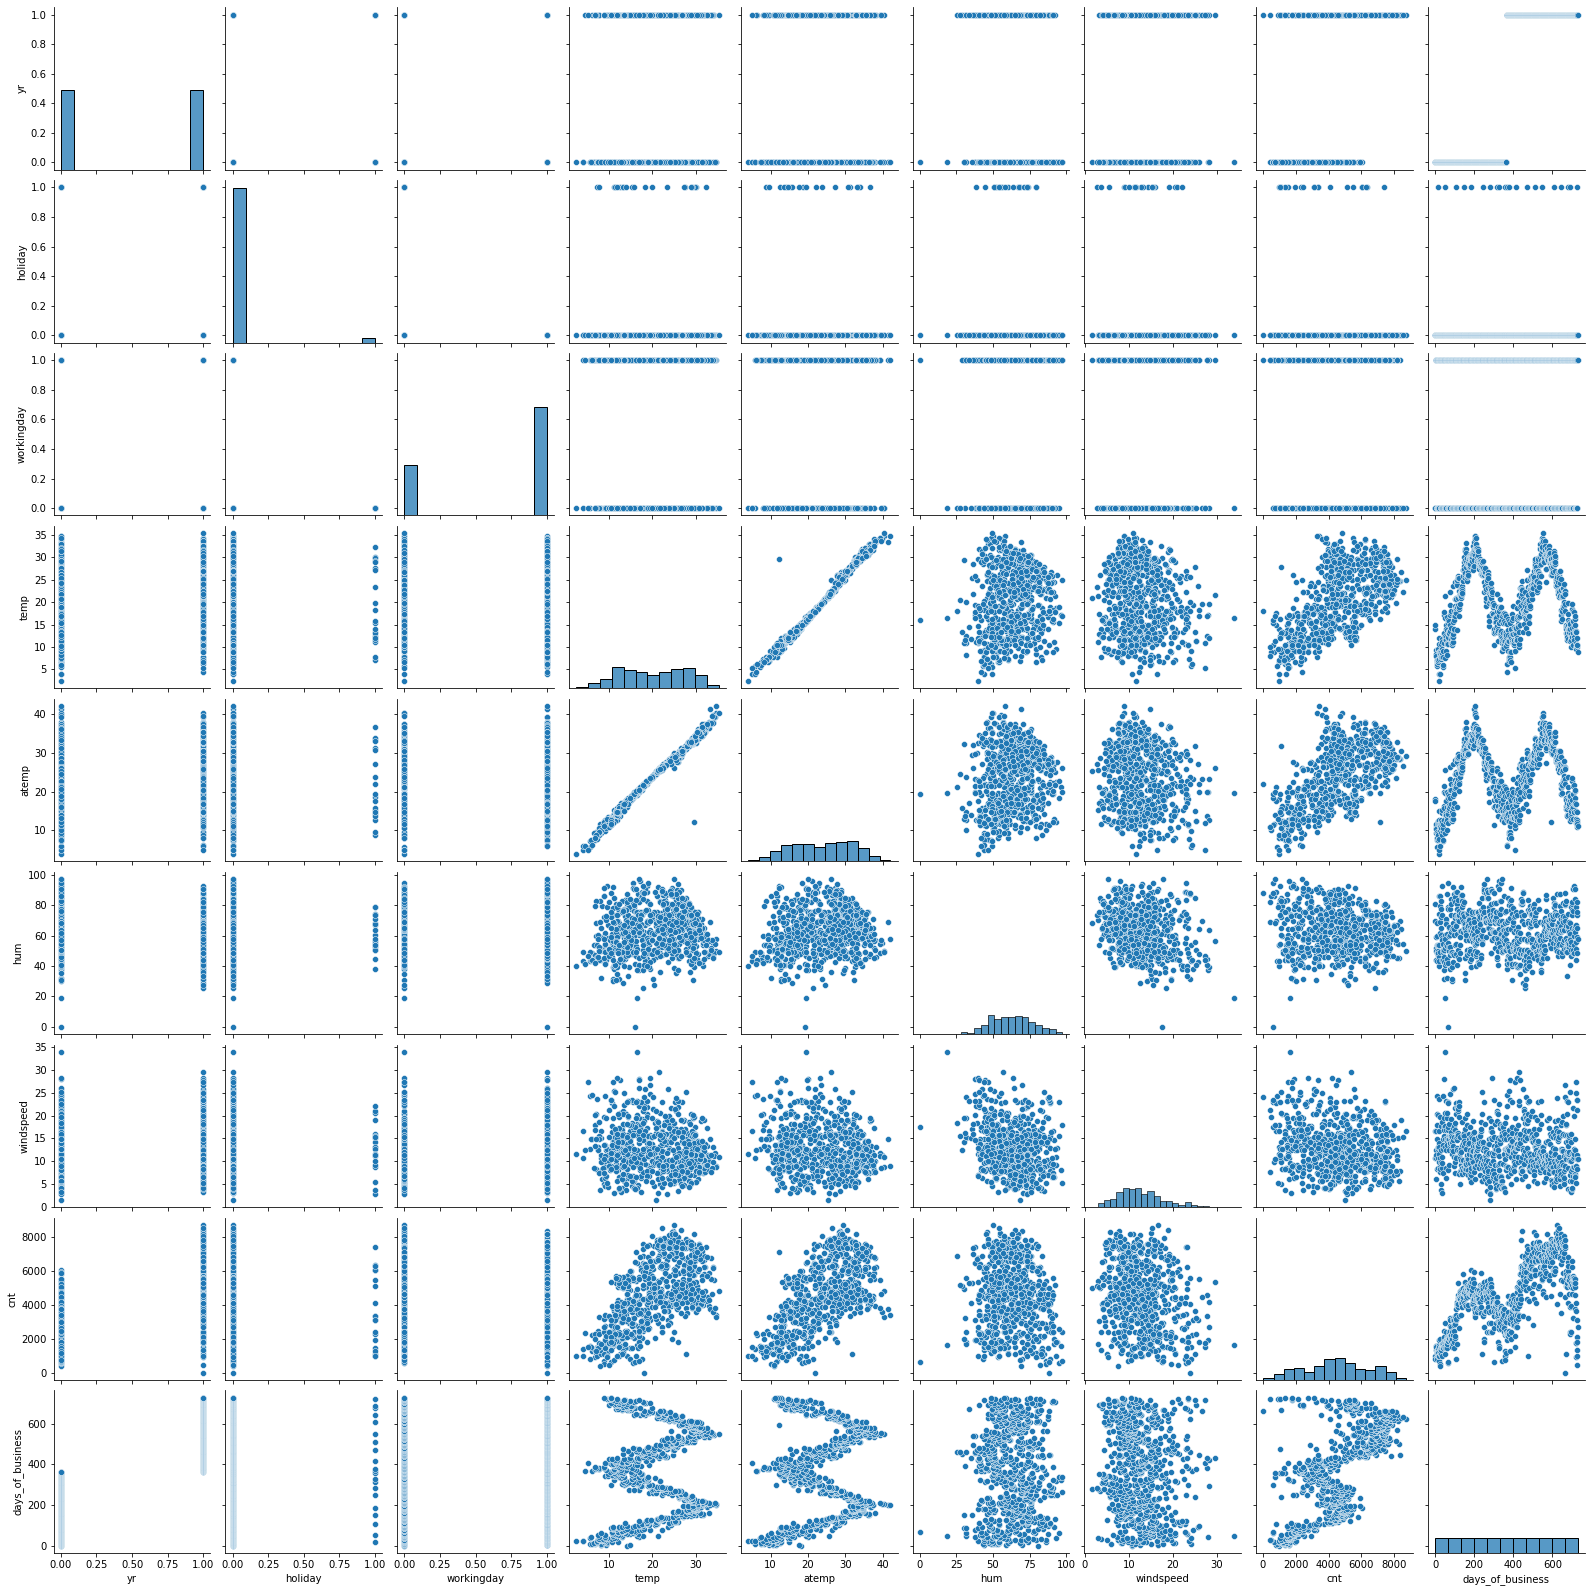

In [24]:
# Scatterplot against multiple features to check if linear regression model can be applied
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(bike_df)
plt.show()

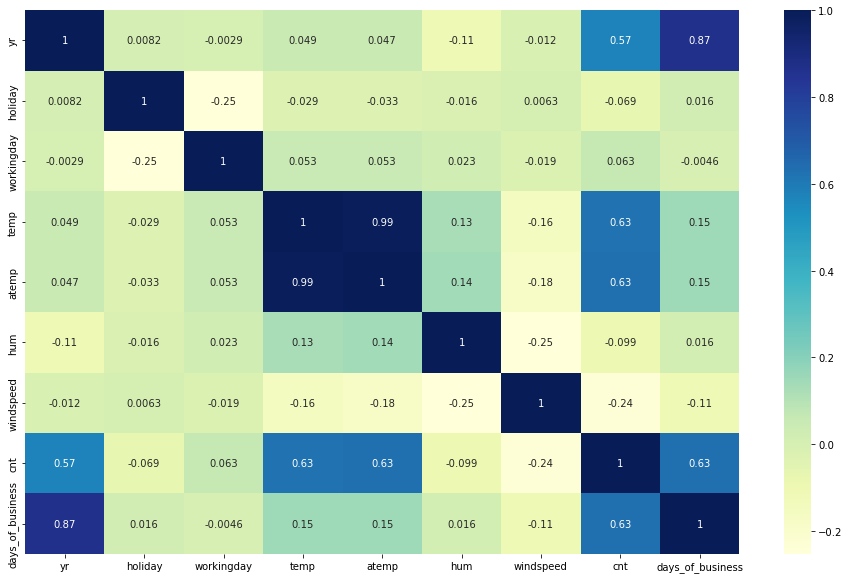

In [25]:
# Observe correlation between features
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), cmap="YlGnBu", annot = True)
plt.show()


### 
- atemp and temp are highly correlated
- It is known that atemp is derived using temperatue, humidity and windspeed
- since all the variables are available, atemp can be dropped

In [26]:
#Drop dteday as other required attributes Year, Month are present
bike_df.drop(['atemp'],axis=1,inplace=True)

In [27]:
bike_df.head(10).append(bike_df.tail(10))

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_of_business
0,spring,0,Jan,0,Mon,0,misty,14.110847,80.5833,10.749882,985,0
1,spring,0,Jan,0,Tue,0,misty,14.902598,69.6087,16.652113,801,1
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349,2
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562,3
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600,4
5,spring,0,Jan,0,Sat,1,clear,8.378268,51.8261,6.000868,1606,5
6,spring,0,Jan,0,Sun,1,misty,8.057402,49.8696,11.304642,1510,6
7,spring,0,Jan,0,Mon,0,misty,6.765000,53.5833,17.875868,959,7
8,spring,0,Jan,0,Tue,0,clear,5.671653,43.4167,24.250650,822,8
9,spring,0,Jan,0,Wed,1,clear,6.184153,48.2917,14.958889,1321,9


# Visualizing the data

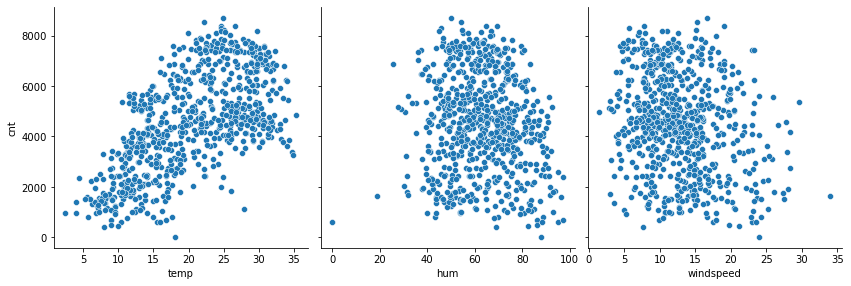

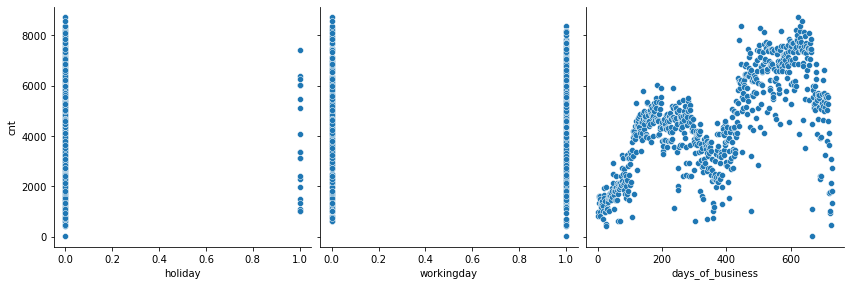

In [28]:
# Scatterplot against multiple features to check if linear regression model can be applied
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(bike_df, x_vars=['temp', 'hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
sns.pairplot(bike_df, x_vars=['holiday','workingday','days_of_business'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

#### A positive correlation is seen between count and temp; Also count of users can be seen increasing as days of business increases, with some dip towards end of year

#### 

In [29]:
### Plot and see the distribution of data

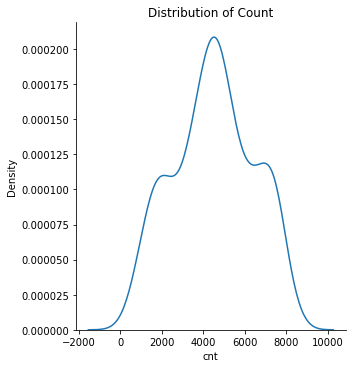

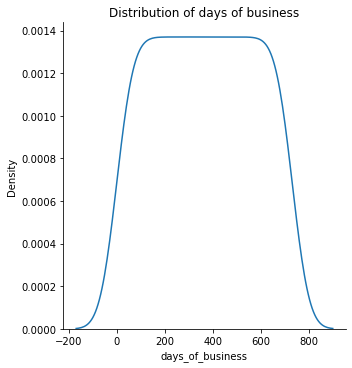

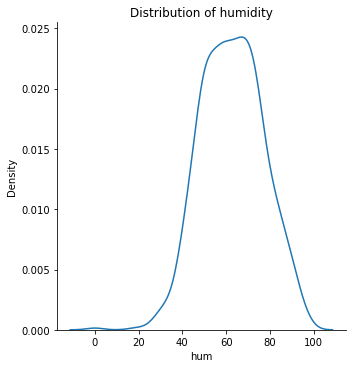

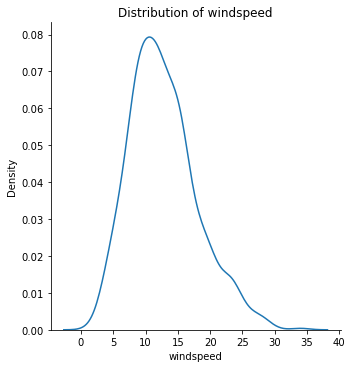

In [30]:
#
# See distribution of data
#
sns.displot(bike_df, x="cnt",kind="kde")
plt.title('Distribution of Count')
plt.show()
sns.displot(bike_df, x="days_of_business",kind="kde")
plt.title('Distribution of days of business')
plt.show()
sns.displot(bike_df, x="hum",kind="kde")
plt.title('Distribution of humidity')
plt.show()
sns.displot(bike_df, x="windspeed",kind="kde")
plt.title('Distribution of windspeed')
plt.show()

### For categorical variables boxplot against target variable

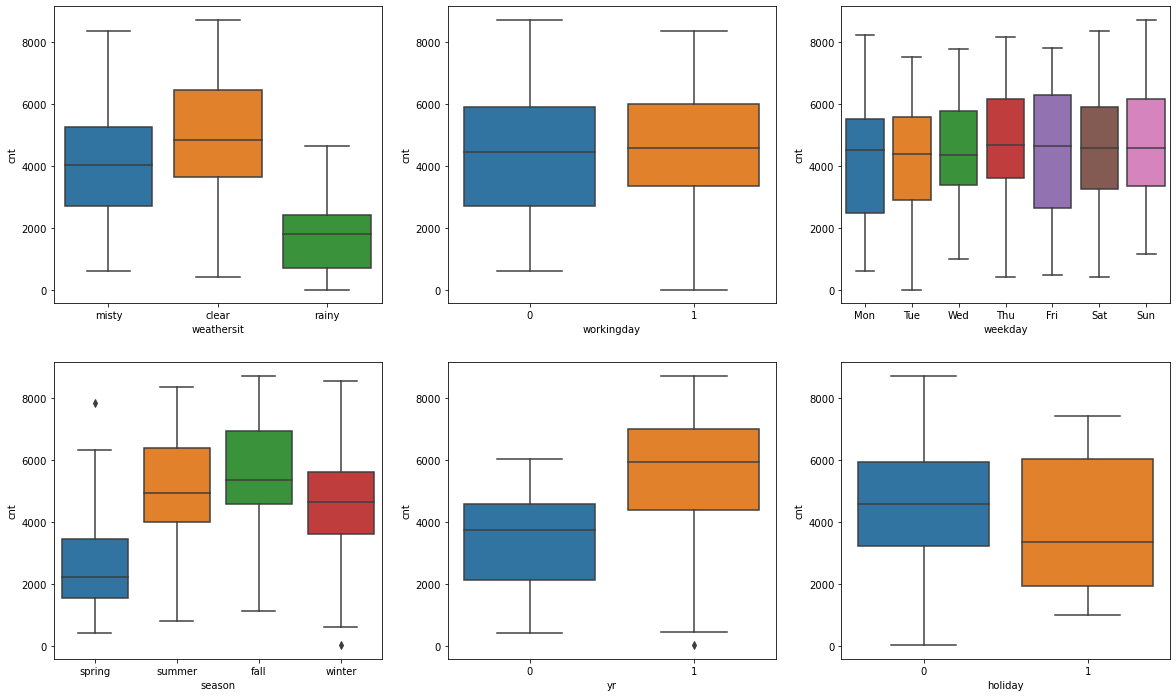

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.show()

<h2 style="color:green"><a style="background-color:yellow;">Observation</a>: </h2>
<li>More users during Clear weather </li>
<li>More users during Summer and fall </li>
<li>Users have increased in 2019 from 2018 </li>
<li>During Workingday a slight increase in number of users is seen </li>
<li>Holiday is not giving a clear picture </li>

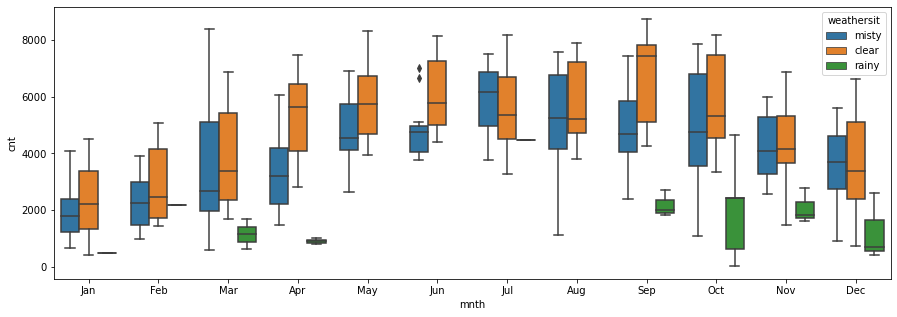

In [32]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'weathersit', data = bike_df)
plt.show()

<h2 style="color:green"><a style="background-color:yellow;">Observation</a>: </h2>
<li>Usage has increased from Jan to Sep and then a drop is observed </li>
<li>Usage is maximum during September</li>
<li>Clear weather is preferred during all months</li>

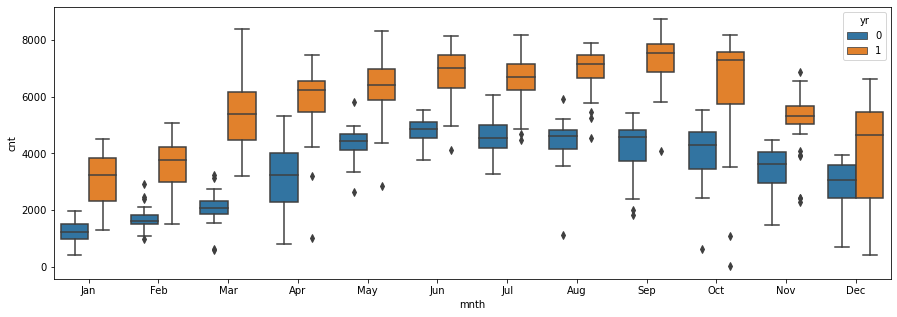

In [33]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bike_df)
plt.show()

<h2 style="color:green"><a style="background-color:yellow;">Observation</a>: </h2>
<li>Usage has increased in 2019 when compared with 2018 </li>
<li>During both years Sep had the maximum usage</li>
<li>Jan and Feb are seeing low usage probably due to cold weather</li>

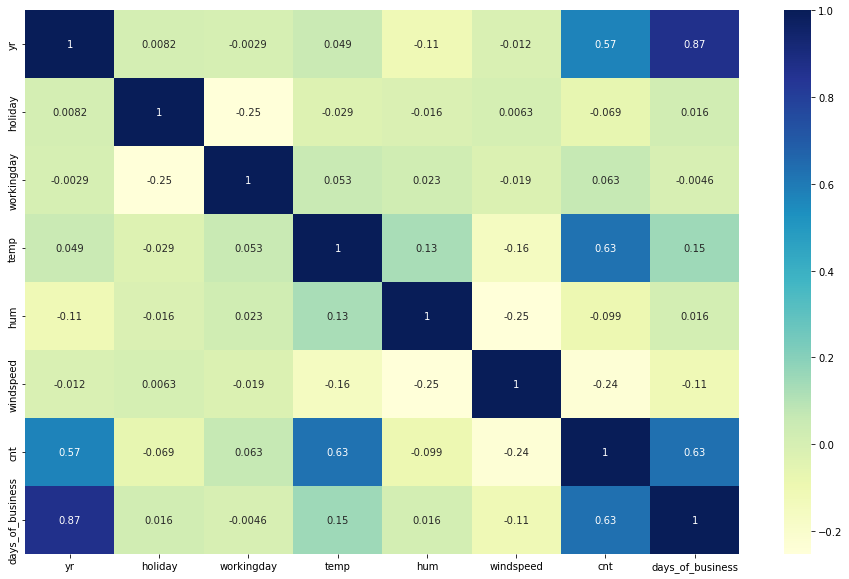

In [34]:
# Observe correlation between features
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

<h2 style="color:green"><a style="background-color:yellow;">Observation</a>: </h2>
<li>Positive correlation between cnt and days of business</li>
<li>Positive correlation between cnt and temp </li>
<li>Initial observation says model will need to have temp and days of business</li>

#### Dummy Variables
- For a linear regression model, need to change categorical variables into dummy variables
- To avoid impact of multi colinearity between dummy variables of same category drop a dummy variable

In [35]:
# Generate dummy variables for the feature 'mnth','season' ,'weekday'
# Avoid dummy variable trap; Drop one level as model can be explained by n-1
bike_df = pd.get_dummies(data=bike_df, columns=['mnth','season' ,'weekday'],drop_first=True)

Since we have seen from boxplot above that clear weather has a positive effect on count, will drop the rainy weather situation

In [36]:
# Dummy columns for weathersit, instead of dropfirst, drop rainy categorical value
bike_df = pd.get_dummies(data=bike_df, columns=['weathersit'])
bike_df.drop('weathersit_rainy',axis=1,inplace=True)

In [37]:
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,days_of_business,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_misty
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,2,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,3,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,4,0,0,...,0,0,0,0,0,0,0,0,1,0


## Split data into training and test sets

In [38]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features using StandardScaler as data seems to be normally distributed

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### On the training data set fit and transform scaler

In [40]:
# Apply scaler() to all columns except the ones having 0 and 1 values
scaling_vars = ['temp', 'hum', 'windspeed', 'cnt','days_of_business']

bike_train[scaling_vars] = scaler.fit_transform(bike_train[scaling_vars])

In [41]:
# View the data post scaling
bike_train.head().append(bike_train.tail())

,yr,holiday,workingday,temp,hum,windspeed,cnt,days_of_business,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_misty
653,1,0,1,-0.121335,-0.514725,-0.117752,1.562685,1.359606,0,0,...,0,1,0,0,0,0,0,1,1,0
576,1,0,1,1.231731,0.516433,-0.330615,1.399629,0.992350,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,-0.420478,-0.069854,-0.385694,-0.215554,0.276915,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,-1.294913,-1.045032,2.018143,-1.379511,1.717324,0,1,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,-0.627580,-1.000840,-0.779889,-0.136589,0.544011,0,0,...,1,0,0,0,1,0,0,0,0,1
526,1,0,1,1.273152,-0.305544,0.205320,1.116587,0.753872,0,0,...,1,0,0,0,0,0,1,0,0,1
578,1,0,1,1.448040,0.201190,-0.787759,1.422703,1.001889,1,0,...,0,0,0,0,0,0,0,0,1,0
53,0,0,1,-1.483204,-1.471329,-1.234384,-1.317467,-1.502132,0,0,...,0,0,0,0,0,0,0,0,1,0
350,0,0,0,-1.281106,-0.497048,0.654645,-0.895981,-0.085572,0,1,...,0,1,1,0,0,0,0,0,0,1
79,0,0,1,-0.330635,0.751352,1.232757,-1.235426,-1.378123,0,0,...,1,0,0,0,0,0,0,1,0,1


## Model Building
- RFE (Recursive Feature Elimination) - From 30 columns automatically bring down to significant columns

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### Divide into X and y sets for model building

In [43]:
y_bike_train = bike_train.pop('cnt')
X_bike_train = bike_train

In [44]:
# Running RFE
lm = LinearRegression()
lm.fit(X_bike_train, y_bike_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_bike_train, y_bike_train)

#### Print columns selected by RFE and their weights

In [45]:
list(zip(X_bike_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 16),
 ('temp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 4),
 ('days_of_business', False, 10),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 12),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 8),
 ('weathersit_clear', True, 1),
 ('weathersit_misty', True, 1)]

In [46]:
# Since multiple models will be built, create a reusable function
import statsmodels.api as sm  
def build_models_func(X_bike_train):
    X_bike_train_lm = X_bike_train
    # Adding a constant variable 
    X_bike_train_lm = sm.add_constant(X_bike_train_lm)
    # Running the linear model
    lm = sm.OLS(y_bike_train,X_bike_train_lm).fit()
    #Print summary of linear model
    print(lm.summary())
    return lm,X_bike_train_lm

In [47]:
# Creating X_train dataframe with RFE selected variables
cols = X_bike_train.columns[rfe.support_]

# Model1

In [48]:
#Build Model
lm1,X_bike_train_lm1 = build_models_func(X_bike_train[cols])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.13e-179
Time:                        06:43:34   Log-Likelihood:                -272.91
No. Observations:                 510   AIC:                             575.8
Df Residuals:                     495   BIC:                             639.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6421      0.115  

#### Feb month has high p value and can hence be dropped from the model

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [49]:
# Define function to calculate VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif_func (X_bike_train):
    vif = pd.DataFrame()
    X = X_bike_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print (vif)

In [50]:
# Print vif for the attributes in the model
calc_vif_func(X_bike_train[cols])

            Features   VIF
9      season_spring  4.44
2               temp  3.32
12  weathersit_clear  3.23
10     season_winter  2.84
5           mnth_Jan  2.43
13  weathersit_misty  2.09
0                 yr  2.05
4           mnth_Feb  1.95
7           mnth_Nov  1.90
3           mnth_Dec  1.69
6           mnth_Jul  1.41
8           mnth_Sep  1.19
11       weekday_Tue  1.19
1            holiday  1.06


#### As seen above all VIFs are below 5

# Model 2

### Month Feb shows high p value and hence is dropped

In [51]:
#### Drop column mnth_Feb
cols = ['yr', 'holiday', 'temp', 'mnth_Dec',  'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'season_spring', 'season_winter', 'weekday_Tue',
       'weathersit_clear', 'weathersit_misty']

In [52]:
#Build Model
lm2,X_bike_train_lm2 = build_models_func(X_bike_train[cols])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.13e-180
Time:                        06:43:34   Log-Likelihood:                -274.30
No. Observations:                 510   AIC:                             576.6
Df Residuals:                     496   BIC:                             635.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6446      0.115  

In [53]:
# Print vif for the attributes in the model
calc_vif_func(X_bike_train[cols])

            Features   VIF
8      season_spring  3.49
11  weathersit_clear  3.20
2               temp  3.17
9      season_winter  2.83
12  weathersit_misty  2.07
0                 yr  2.05
6           mnth_Nov  1.86
4           mnth_Jan  1.75
3           mnth_Dec  1.55
5           mnth_Jul  1.40
7           mnth_Sep  1.19
10       weekday_Tue  1.19
1            holiday  1.06


#### Month and season are known to be correlated, plot correlation between features of the model

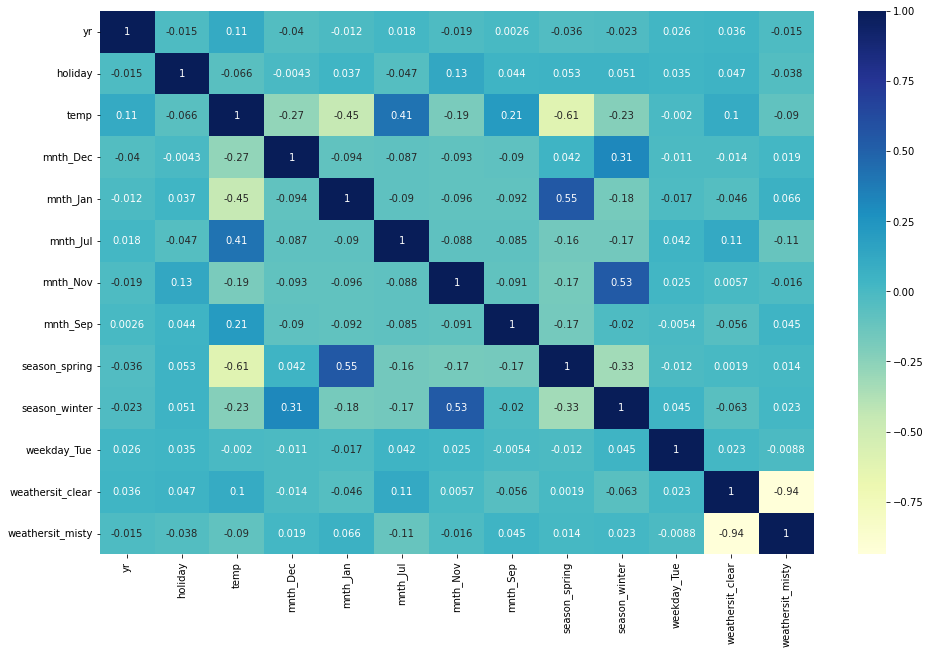

In [54]:
# Observe correlation between features
plt.figure(figsize = (16, 10))
sns.heatmap(X_bike_train[cols].corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Spring is found to be correlated with Jan, prepare another model by dropping this column

# Model 3

In [55]:
cols = ['yr', 'holiday', 'temp', 'mnth_Dec',  'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'season_winter', 'weekday_Tue',
       'weathersit_clear', 'weathersit_misty']

In [56]:
#Build Model
lm3,X_bike_train_lm3 = build_models_func(X_bike_train[cols])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.01e-172
Time:                        06:43:35   Log-Likelihood:                -296.00
No. Observations:                 510   AIC:                             618.0
Df Residuals:                     497   BIC:                             673.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7854      0.118  

In [57]:
# Print vif for the attributes in the model
calc_vif_func(X_bike_train[cols])

            Features   VIF
8      season_winter  2.35
10  weathersit_clear  2.34
0                 yr  2.04
2               temp  2.04
6           mnth_Nov  1.85
11  weathersit_misty  1.71
4           mnth_Jan  1.65
3           mnth_Dec  1.55
5           mnth_Jul  1.39
7           mnth_Sep  1.19
9        weekday_Tue  1.19
1            holiday  1.06


#### Model shows high p value for Novemeber, We had also seen high correlation between November and season winter 

# Model 4

In [58]:
# Drop November month
cols = ['yr', 'holiday', 'temp', 'mnth_Dec', 'mnth_Jan',  'mnth_Jul',
        'mnth_Sep', 'season_winter', 'weekday_Tue',
       'weathersit_clear', 'weathersit_misty']

In [59]:
#Build Model
lm4,X_bike_train_lm4 = build_models_func(X_bike_train[cols])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     195.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.29e-172
Time:                        06:43:35   Log-Likelihood:                -297.86
No. Observations:                 510   AIC:                             619.7
Df Residuals:                     498   BIC:                             670.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7770      0.118  

In [60]:
# Print vif for the attributes in the model
calc_vif_func(X_bike_train[cols])

            Features   VIF
9   weathersit_clear  2.31
0                 yr  2.04
2               temp  1.96
10  weathersit_misty  1.71
4           mnth_Jan  1.61
7      season_winter  1.61
5           mnth_Jul  1.39
3           mnth_Dec  1.33
8        weekday_Tue  1.19
6           mnth_Sep  1.18
1            holiday  1.04


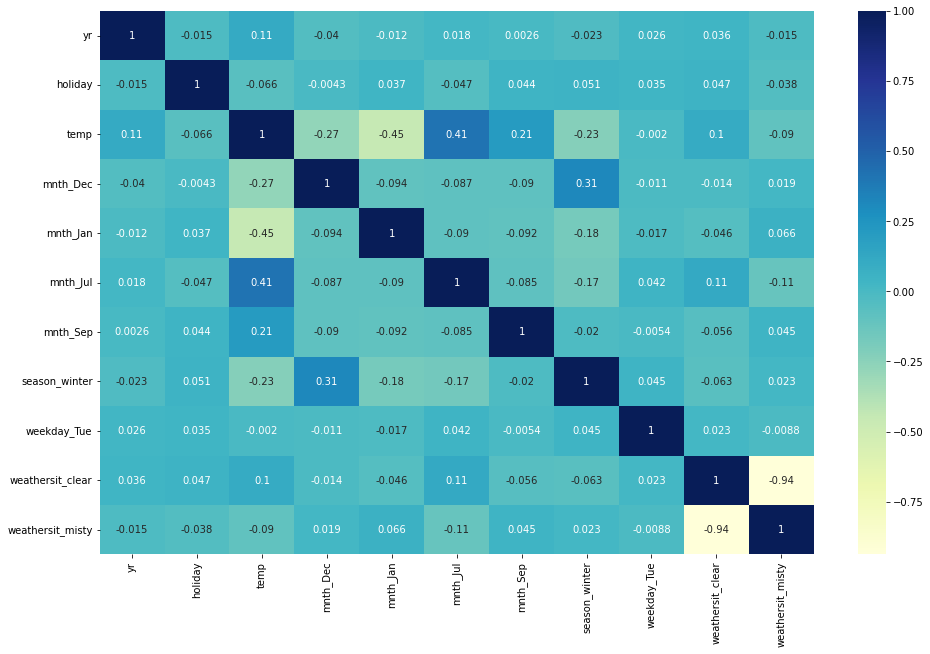

In [61]:
# Observe correlation between features
plt.figure(figsize = (16, 10))
sns.heatmap(X_bike_train[cols].corr(), cmap="YlGnBu", annot = True)
plt.show()

# Model 5

### December shows high p value, drop the feature

In [62]:
# Drop December month
cols = ['yr', 'holiday', 'temp',  'mnth_Jan',  'mnth_Jul',
        'mnth_Sep', 'season_winter', 'weekday_Tue',
       'weathersit_clear', 'weathersit_misty']

In [63]:
#Build Model
lm5,X_bike_train_lm5 = build_models_func(X_bike_train[cols])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     213.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.48e-173
Time:                        06:43:36   Log-Likelihood:                -299.30
No. Observations:                 510   AIC:                             620.6
Df Residuals:                     499   BIC:                             667.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7735      0.118  

#### High F statistic (overall model fit) is observed in Model 5

#### 

# Model 6

#### Similar to Model 4, try dropping season_winter instead of mnth_Nov

In [64]:
# Drop November month
cols = ['yr', 'holiday', 'temp', 'mnth_Dec',  'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep',  'weekday_Tue',
       'weathersit_clear', 'weathersit_misty']

In [65]:
#Build Model
lm6,X_bike_train_lm6 = build_models_func(X_bike_train[cols])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     164.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.75e-158
Time:                        06:43:36   Log-Likelihood:                -332.12
No. Observations:                 510   AIC:                             688.2
Df Residuals:                     498   BIC:                             739.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5902      0.124  

In [66]:
# Print vif for the attributes in the model
calc_vif_func(X_bike_train[cols])

            Features   VIF
9   weathersit_clear  2.27
0                 yr  2.04
2               temp  2.03
10  weathersit_misty  1.65
4           mnth_Jan  1.61
5           mnth_Jul  1.39
3           mnth_Dec  1.33
6           mnth_Nov  1.27
8        weekday_Tue  1.19
7           mnth_Sep  1.18
1            holiday  1.06


## Residual Analysis of the train data

In [67]:
y_train_cnt_pred = lm5.predict(X_bike_train_lm5)

In [68]:
lm5.params

const              -1.773520
yr                  1.033688
holiday            -0.473917
temp                0.589597
mnth_Jan           -0.259626
mnth_Jul           -0.316563
mnth_Sep            0.314248
season_winter       0.444573
weekday_Tue        -0.126116
weathersit_clear    1.345769
weathersit_misty    1.010320
dtype: float64

Text(0.5, 0, 'Errors')

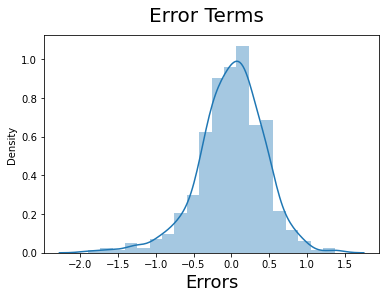

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
res = (y_bike_train - y_train_cnt_pred)
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

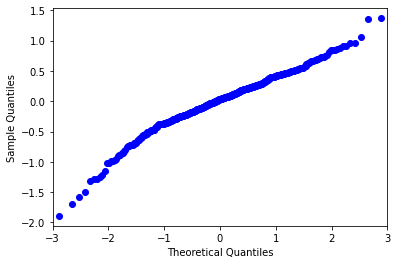

In [70]:
# Plot QQ plot
#import scipy.stats as stats
sm.qqplot(res)
plt.show()

## Error Terms are normally distributed

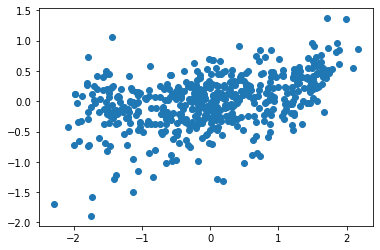

In [71]:
#Look for pattern for residuals
plt.scatter(y_bike_train,res)
plt.show()

## Error terms are independent of each other

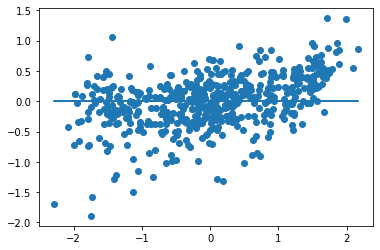

In [72]:
plt.scatter(y_bike_train, res)
plt.plot(y_bike_train, [0]*len(y_bike_train))

# Making Predictions Using the Final Model

In [73]:
#Apply Scaling
bike_test[scaling_vars] = scaler.transform(bike_test[scaling_vars])

In [74]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,days_of_business,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.096083,-0.081388,-0.043731,0.031073,-0.058021,0.059361,0.086758,...,0.264840,0.232877,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.319635
std,0.500722,0.188034,0.459904,1.035793,1.022197,0.942916,0.973536,1.019090,0.236840,0.282125,...,0.442259,0.423633,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.467403
min,0.000000,0.000000,0.000000,-2.174744,-2.665411,-2.143341,-2.074296,-1.740610,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.809372,-0.844689,-0.720691,-0.606530,-0.944093,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.094973,-0.155290,-0.125622,0.047490,-0.095111,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.983209,0.641963,0.485055,0.709202,0.803952,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.981904,2.413751,2.869216,2.004169,1.722093,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# Divide into X and Y set
y_bike_test = bike_test.pop('cnt')
X_bike_test = bike_test

In [76]:
# Adding constant variable to test dataframe
X_bike_test_lm = sm.add_constant(X_bike_test)

In [77]:
# Define a function to get difference in two lists
def Diff(li1, li2):
    return list(set(li1) - set(li2))

In [78]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

#X_bike_test_lm = X_bike_test_lm.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)
X_bike_test_lm.drop(Diff(X_bike_test_lm.columns,X_bike_train_lm5.columns),axis=1,inplace=True)

In [79]:
# Making predictions using the fourth model

y_pred_test_lm = lm5.predict(X_bike_test_lm)

In [80]:
X_bike_test_lm.shape

(219, 11)

# Model Evaluation

Text(0, 0.5, 'y_pred_test_lm')

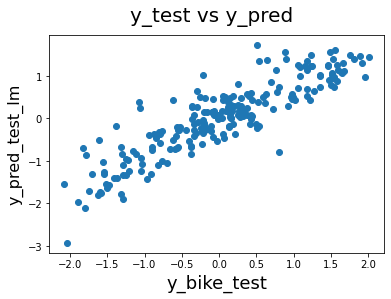

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_bike_test, y_pred_test_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_bike_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test_lm', fontsize = 16)      

Text(0, 0.5, 'Views')

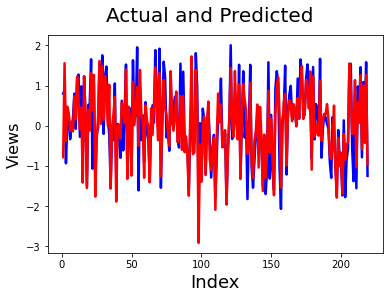

In [82]:
#Actual vs Predicted
len_ytest= len(y_pred_test_lm)+1
c = [i for i in range(1,len_ytest,1)]
fig = plt.figure()
plt.plot(c,y_bike_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_test_lm, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label


## Printing R2 score to see prediction results

In [84]:
from sklearn.metrics import r2_score
r2_score(y_bike_test, y_pred_test_lm)

0.7825560178225792